# The Bread Baked E.D.A
- Dataset: https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r'../data/'
file = path + "the_bread_basket.zip"

df = pd.read_csv(file)

In [3]:
df.shape

(20507, 5)

In [4]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [111]:
df.isna().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

## Splitting Date-Time into separate columns

In [165]:
df['date_time']=pd.to_datetime(df['date_time'])
df['date']=df['date_time'].dt.date
df['time']=df['date_time'].dt.time
df['month']=df['date_time'].dt.month

df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

months = ['January','February','March','April','May','June','July','August',
                                          'September','October','November','December']

df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

df['hour']=df['date_time'].dt.hour
df['day']=df['date_time'].dt.weekday

df['day'] = df['day'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

In [166]:
df.drop('date_time', axis=1, inplace=True)
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,day
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10,Sunday


## Most Popular Items Ever

<AxesSubplot: >

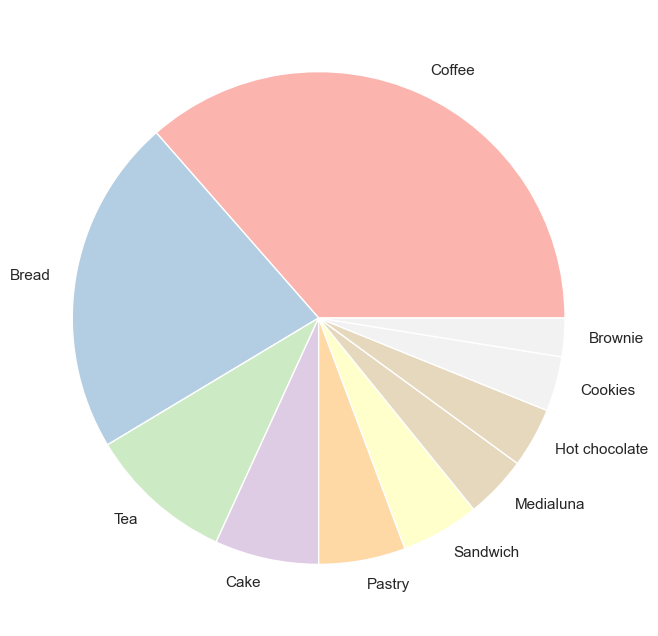

In [115]:
df.Item.value_counts().head(10).plot(ylabel="", figsize=(8,8), kind='pie', stacked=True, colormap='Pastel1')

## Spliting the data based on period of day

In [116]:
df_morning = df[df['period_day']=="morning"]
df_afternoon = df[df['period_day']=="afternoon"]
df_evening = df[df['period_day']=="evening"]
df_night = df[df['period_day']=="night"]

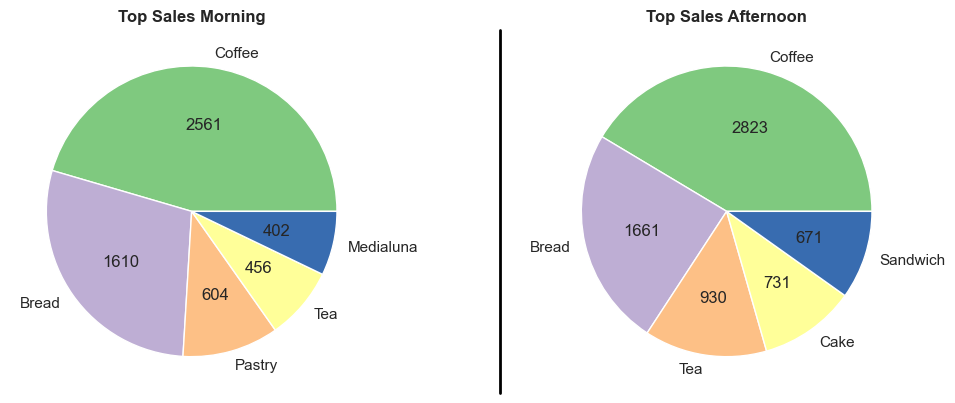

In [117]:
d1 = df_morning.Item.value_counts().head(5)
d2 = df_afternoon.Item.value_counts().head(5)


# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("Top Sales Morning", fontweight='bold')
ax2.set_title("Top Sales Afternoon", fontweight='bold')


# plot a pie chart for each data series
ax1.pie(x=d1, labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2, labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))


# insert line between subplots
ax1.plot([1.35, 1.35], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

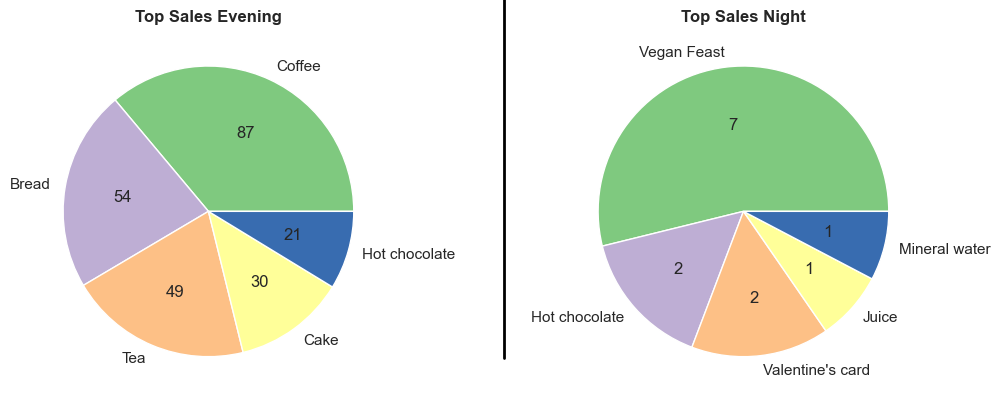

In [118]:
d3 = df_evening.Item.value_counts().head(5)
d4 = df_night.Item.value_counts().head(5)

# create subplots
fig, (ax3, ax4) = plt.subplots(1, 2)
fig.tight_layout(rect=(0,0,1.7,0.9))

ax3.set_title("Top Sales Evening", fontweight='bold')
ax4.set_title("Top Sales Night", fontweight='bold')

ax3.pie(x=d3, labels=d3.index, autopct=lambda x: '{:.0f}'.format(x*d3.values.sum()/100))
ax4.pie(x=d4, labels=d4.index, autopct=lambda x: '{:.0f}'.format(x*d4.values.sum()/100))

# insert line between subplots
ax3.plot([1.10, 1.10], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

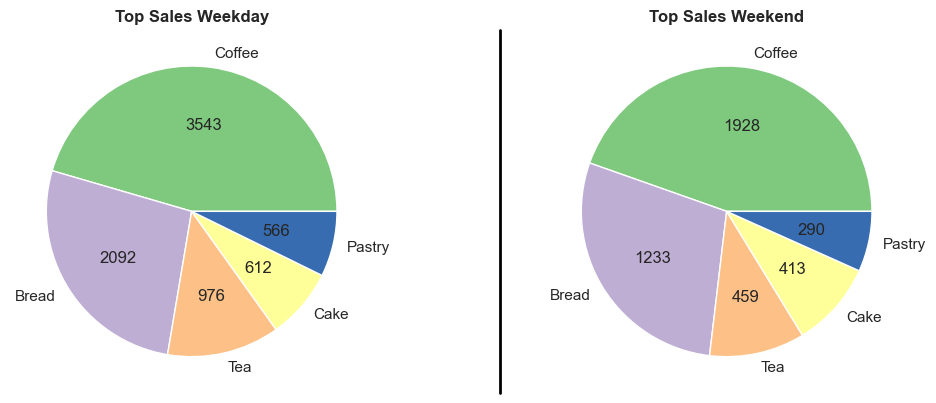

In [119]:
df_weekday = df[df['weekday_weekend']=="weekday"]
df_weekend = df[df['weekday_weekend']=="weekend"]

d1 = df_weekday.Item.value_counts().head(5)
d2 = df_weekend.Item.value_counts().head(5)


# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("Top Sales Weekday", fontweight='bold')
ax2.set_title("Top Sales Weekend", fontweight='bold')


# plot a pie chart for each data series
ax1.pie(x=d1, labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2, labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))


# insert line between subplots
ax1.plot([1.35, 1.35], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

In [ ]:
df_weekday = df[df['weekday_weekend']=="weekday"]
df_weekend = df[df['weekday_weekend']=="weekend"]

d1 = df_weekday.Item.value_counts().head(5)
d2 = df_weekend.Item.value_counts().head(5)


# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("Top Sales Weekday", fontweight='bold')
ax2.set_title("Top Sales Weekend", fontweight='bold')


# plot a pie chart for each data series
ax1.pie(x=d1, labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2, labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))


# insert line between subplots
ax1.plot([1.35, 1.35], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

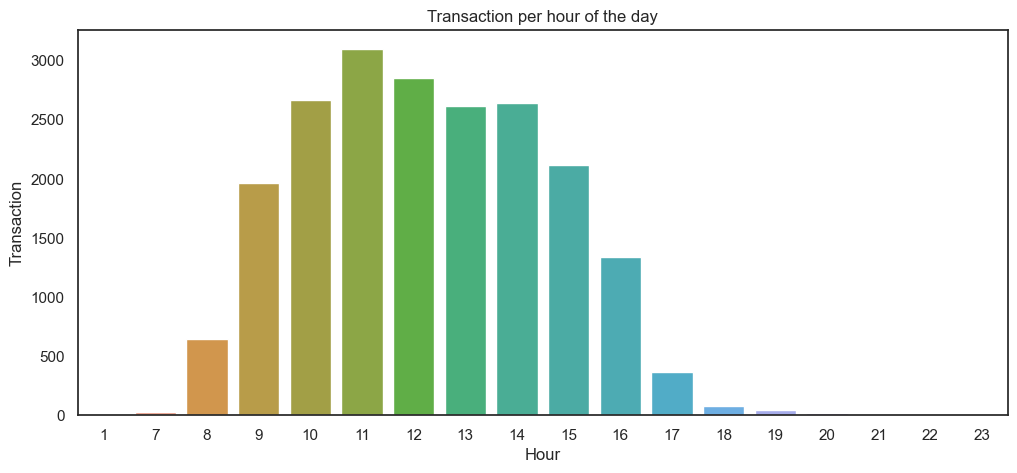

In [140]:
coutbyhour=df.groupby('hour')['Transaction'].count().reset_index()
coutbyhour.sort_values('hour',inplace=True)

fig = plt.figure(figsize=(12,5))
sns.barplot(x=coutbyhour['hour'], y=coutbyhour['Transaction'])
plt.xlabel('Hour')
plt.ylabel('Transaction')
plt.title('Transaction per hour of the day')
plt.show()

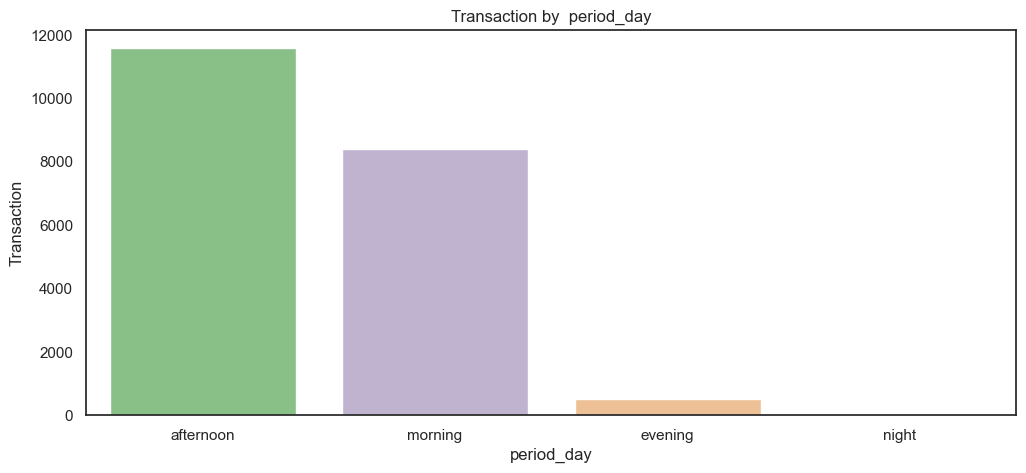

In [153]:
coutbyperiod=df.groupby('period_day')['Transaction'].count().reset_index()
coutbyperiod.sort_values('Transaction', ascending=False, inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(x=coutbyperiod['period_day'], y=coutbyperiod['Transaction'])
plt.xlabel('period_day')
plt.ylabel('Transaction')
plt.title('Transaction by  period_day')
plt.show()

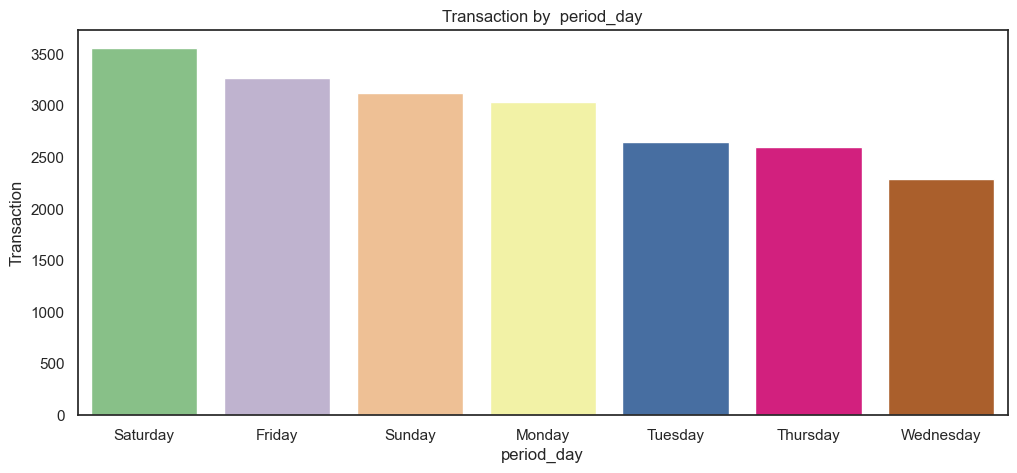

In [154]:
coutbyweekday=df.groupby('day')['Transaction'].count().reset_index()
coutbyweekday.sort_values('Transaction', ascending=False, inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(x=coutbyweekday['day'], y=coutbyweekday['Transaction'])
plt.xlabel('period_day')
plt.ylabel('Transaction')
plt.title('Transaction by  period_day')
plt.show()

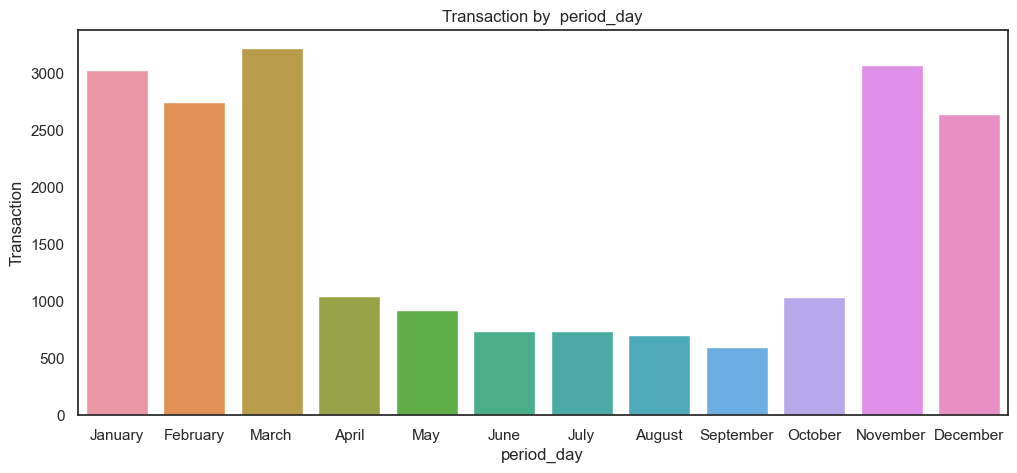

In [167]:
coutbymonth=df.groupby('month')['Transaction'].count().reset_index()
coutbymonth.sort_values('month', inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(x=coutbymonth['month'], y=coutbymonth['Transaction'])
plt.xlabel('period_day')
plt.ylabel('Transaction')
plt.title('Transaction by  period_day')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Coffee'),
  Text(1, 0, 'Bread'),
  Text(2, 0, 'Tea'),
  Text(3, 0, 'Cake'),
  Text(4, 0, 'Pastry'),
  Text(5, 0, 'Sandwich'),
  Text(6, 0, 'Medialuna'),
  Text(7, 0, 'Hot chocolate'),
  Text(8, 0, 'Cookies'),
  Text(9, 0, 'Brownie'),
  Text(10, 0, 'Farm House'),
  Text(11, 0, 'Muffin'),
  Text(12, 0, 'Alfajores'),
  Text(13, 0, 'Juice'),
  Text(14, 0, 'Soup'),
  Text(15, 0, 'Scone'),
  Text(16, 0, 'Toast'),
  Text(17, 0, 'Scandinavian'),
  Text(18, 0, 'Truffles'),
  Text(19, 0, 'Coke'),
  Text(20, 0, 'Spanish Brunch'),
  Text(21, 0, 'Fudge'),
  Text(22, 0, 'Baguette'),
  Text(23, 0, 'Jam'),
  Text(24, 0, 'Tiffin')])

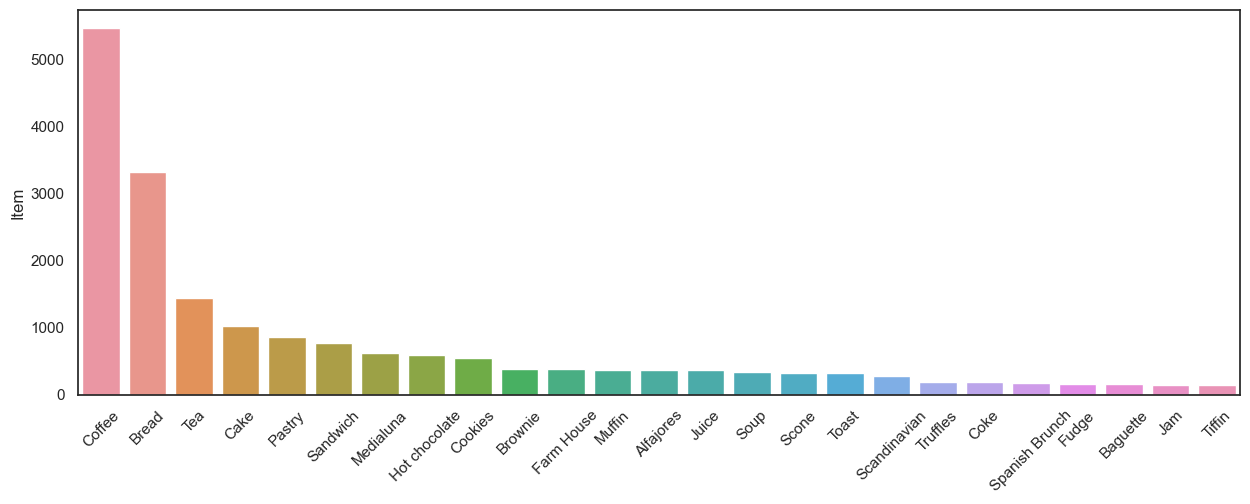

In [169]:
fig = plt.figure(figsize=(15,5))

names = df.Item.value_counts().head(25).index
values = df.Item.value_counts().head(25)
sns.barplot(x = names, y = values)
plt.xticks(rotation=45)

# Apriori

In [173]:
import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori

In [175]:
transactions = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [176]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
table = transactions.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)

In [177]:
table.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction
def hot_encode(x): 
    if(x==0): 
        return False
    if(x>0): 
        return True

In [185]:
# applying the function to the dataset
final_table=table.applymap(hot_encode)

In [186]:
final_table.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [187]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequence = apriori(final_table, min_support=0.015, use_colnames=True)
rules = association_rules(frequence, metric="lift", min_threshold=1)

In [188]:
# now making the rules from frequent itemset generated above
rules.sort_values('confidence', ascending = False, inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
16,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
20,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
14,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
22,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
24,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
10,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
12,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553


In [189]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
16,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
20,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
14,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
22,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
24,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
10,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
12,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
